In [17]:
import sys
import os

import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
from matplotlib import pylab as plt
from scipy.spatial.distance import squareform
from numba import njit, prange
from numpy import save
from numpy import load
from scipy import stats

sns.set_style('ticks')
sns.set_context('talk')

FOLDER_PATH = "/Users/sdaste/Desktop/DATA/Javier/Analysis"

In [2]:
# Mouse1_0629 = Capsaicine
# Mouse3_0629 = Capsaicine + Conotoxin
# Mouse1_0625 = Capsaicine
# Mouse2_0625 = Capsaicine + Conotoxin
# Mouse3_0625 = Capsaicine + Conotoxin ??
# Mouse3_0618 = Capsaicine
# Mouse4_0629 = Capsaicine
# Mouse4_0625 = Capsaicine
# Mouse4_0618 = Capsaicine + Conotoxin

In [3]:
dataframe = pd.read_excel('/Users/sdaste/Downloads/Results-Normalized3.xlsx', sheet_name='Ngroupsordered')

In [4]:
print(dataframe.columns.ravel())

['M01_T1' 'M01_T2' 'M01_T3' 'M02_T1' 'M02_T2' 'M02_T3']


In [5]:
dataframe

M01_T1      M01_T2      M01_T3  M02_T1      M02_T2      M02_T3
0     100.0  276.858758  191.939427   100.0  289.007469  126.574934
1     100.0  271.032070  296.660713   100.0  251.893145  116.012606
2     100.0  259.761155   84.142423   100.0  208.886469   77.264936
3     100.0  236.913434   75.502791   100.0  207.692983   89.652485
4     100.0  233.686865  152.510511   100.0  207.241002  102.721678
..      ...         ...         ...     ...         ...         ...
141     NaN         NaN         NaN   100.0   27.509024   18.641275
142     NaN         NaN         NaN   100.0   24.666213   20.863201
143     NaN         NaN         NaN   100.0   18.881018   16.204790
144     NaN         NaN         NaN   100.0   14.720318    9.752016
145     NaN         NaN         NaN   100.0   12.125229   16.588144

[146 rows x 6 columns]

In [6]:
# CREATE A LIST FROM EACH MICE, EACH TIME VALUES

# T1_Mean = dataframe['T1_Mean'].tolist()
# T2_Mean = dataframe['T2_Mean'].tolist()
# T3_Mean = dataframe['T3_Mean'].tolist()

# T1_Mean_Cap = dataframe['T1_Cap_norm'].tolist()
# T2_Mean_Cap = dataframe['T2_Cap_norm'].tolist()
# T3_Mean_Cap = dataframe['T3_Cap_norm'].tolist()

# T1_Mean_Cap_Con = dataframe['T1_Con_norm'].tolist()
# T2_Mean_Cap_Con = dataframe['T2_Con_norm'].tolist()
# T3_Mean_Cap_Con = dataframe['T3_Con_norm'].tolist()

Mouse1_0629_T1 = dataframe['M01_T1'].tolist()
Mouse1_0629_T2 = dataframe['M01_T2'].tolist()
Mouse1_0629_T3 = dataframe['M01_T3'].tolist()
Mouse3_0629_T1 = dataframe['M02_T1'].tolist()
Mouse3_0629_T2 = dataframe['M02_T2'].tolist()
Mouse3_0629_T3 = dataframe['M02_T3'].tolist()
# Mouse1_0625_T1 = dataframe['M03_T1'].tolist()
# Mouse1_0625_T2 = dataframe['M03_T2'].tolist()
# Mouse1_0625_T3 = dataframe['M03_T3'].tolist()
# Mouse2_0625_T1 = dataframe['M04_T1'].tolist()
# Mouse2_0625_T2 = dataframe['M04_T2'].tolist()
# Mouse2_0625_T3 = dataframe['M04_T3'].tolist()
# Mouse3_0625_T1 = dataframe['M05_T1'].tolist()
# Mouse3_0625_T2 = dataframe['M05_T2'].tolist()
# Mouse3_0625_T3 = dataframe['M05_T3'].tolist()
# Mouse3_0618_T1 = dataframe['M06_T1'].tolist()
# Mouse3_0618_T2 = dataframe['M06_T2'].tolist()
# Mouse3_0618_T3 = dataframe['M06_T3'].tolist()
# Mouse4_0629_T1 = dataframe['0629_Mouse4_T1'].tolist()
# Mouse4_0629_T2 = dataframe['0629_Mouse4_T2'].tolist()
# Mouse4_0629_T3 = dataframe['0629_Mouse4_T3'].tolist()
# Mouse4_0625_T1 = dataframe['0625_Mouse4_T1'].tolist()
# Mouse4_0625_T2 = dataframe['0625_Mouse4_T2'].tolist()
# Mouse4_0625_T3 = dataframe['0625_Mouse4_T3'].tolist()
# Mouse4_0618_T1 = dataframe['0618_Mouse4_T1'].tolist()
# Mouse4_0618_T2 = dataframe['0618_Mouse4_T2'].tolist()
# Mouse4_0618_T3 = dataframe['0618_Mouse4_T3'].tolist()

In [7]:
# CONCATENATE ALL TIMES FOR EACH MICE TOGETHER

# AllMice = T1_Mean,T2_Mean,T3_Mean
# AllMiceCap = T1_Mean_Cap,T2_Mean_Cap,T3_Mean_Cap
# AllMiceCapCon=T1_Mean_Cap_Con,T2_Mean_Cap_Con,T3_Mean_Cap_Con
Mouse1_0629 = Mouse1_0629_T1,Mouse1_0629_T2,Mouse1_0629_T3
Mouse3_0629 = Mouse3_0629_T1,Mouse3_0629_T2,Mouse3_0629_T3
# Mouse1_0625 = Mouse1_0625_T1,Mouse1_0625_T2,Mouse1_0625_T3
# Mouse2_0625 = Mouse2_0625_T1,Mouse2_0625_T2,Mouse2_0625_T3
# Mouse3_0625 = Mouse3_0625_T1,Mouse3_0625_T2,Mouse3_0625_T3
# Mouse3_0618 = Mouse3_0618_T1,Mouse3_0618_T2,Mouse3_0618_T3
# Mouse4_0629 = Mouse4_0629_T1,Mouse4_0629_T2,Mouse4_0629_T3
# Mouse4_0625 = Mouse4_0625_T1,Mouse4_0625_T2,Mouse4_0625_T3
# Mouse4_0618 = Mouse4_0618_T1,Mouse4_0618_T2,Mouse4_0618_T3

In [8]:
# CREATE THE NUMPY ARRAYS

# AllMice = np.array(AllMice)
# AllMiceCap=np.array(AllMiceCap)
# AllMiceCapCon=np.array(AllMiceCapCon)
Mouse1_0629 = np.array(Mouse1_0629)
Mouse3_0629 = np.array(Mouse3_0629)
# Mouse1_0625 = np.array(Mouse1_0625)
# Mouse2_0625 = np.array(Mouse2_0625)
# Mouse3_0625 = np.array(Mouse3_0625)
# Mouse3_0618 = np.array(Mouse3_0618)
# Mouse4_0629 = np.array(Mouse4_0629)
# Mouse4_0625 = np.array(Mouse4_0625)
# Mouse4_0618 = np.array(Mouse4_0618)

In [9]:
# Remove NaN values from Excel file
# AllMiceCap=AllMiceCap[:, ~np.isnan(AllMiceCap).any(axis=0)]
# AllMiceCapCon=AllMiceCapCon[:, ~np.isnan(AllMiceCapCon).any(axis=0)]
#AllMiceCap=AllMiceCap[:, ~np.isnan(AllMiceCap).any(axis=1)]
#AllMiceCapCon=AllMiceCap[:, ~np.isnan(AllMiceCapCon).any(axis=1)]
Mouse1_0629= Mouse1_0629[:, ~np.isnan(Mouse1_0629).any(axis=0)]
Mouse3_0629= Mouse3_0629[:, ~np.isnan(Mouse3_0629).any(axis=0)]
# Mouse1_0625= Mouse1_0625[:, ~np.isnan(Mouse1_0625).any(axis=0)]
# Mouse2_0625= Mouse2_0625[:, ~np.isnan(Mouse2_0625).any(axis=0)]
# Mouse3_0625= Mouse3_0625[:, ~np.isnan(Mouse3_0625).any(axis=0)]
# Mouse3_0618= Mouse3_0618[:, ~np.isnan(Mouse3_0618).any(axis=0)]
# Mouse4_0629= Mouse4_0629[:, ~np.isnan(Mouse4_0629).any(axis=0)]
# Mouse4_0625= Mouse4_0625[:, ~np.isnan(Mouse4_0625).any(axis=0)]
# Mouse4_0618= Mouse4_0618[:, ~np.isnan(Mouse4_0618).any(axis=0)]


In [10]:
# Transpose dimensions 0 and 1

# AllMice = AllMice.transpose(1,0)
# AllMiceCap = AllMiceCap.transpose(1,0)
# AllMiceCapCon = AllMiceCapCon.transpose(1,0)
Mouse1_0629 = Mouse1_0629.transpose(1,0)
Mouse3_0629 = Mouse3_0629.transpose(1,0)
# Mouse1_0625 = Mouse1_0625.transpose(1,0)
# Mouse2_0625 = Mouse2_0625.transpose(1,0)
# Mouse3_0625 = Mouse3_0625.transpose(1,0)
# Mouse3_0618 = Mouse3_0618.transpose(1,0)
# Mouse4_0629 = Mouse4_0629.transpose(1,0)
# Mouse4_0625 = Mouse4_0625.transpose(1,0)
# Mouse4_0618 = Mouse4_0618.transpose(1,0)

In [27]:
X = np.concatenate((Mouse1_0629,Mouse3_0629))

In [28]:
X.shape

(268, 3)

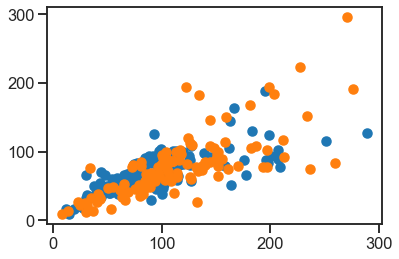

In [35]:
plt.scatter(Mouse3_0629[:,1], Mouse3_0629[:,2])
plt.scatter(Mouse1_0629[:,1], Mouse1_0629[:,2])
plt.show()

In [18]:
result_array_correlation = stats.pearsonr(Mouse1_0629,Mouse3_0629)

ValueError: x and y must have the same length.

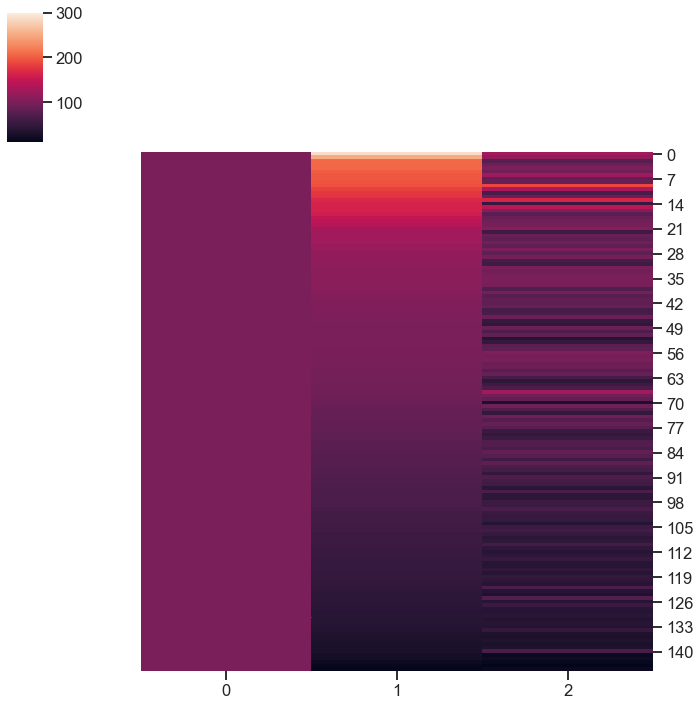

In [14]:
sns.clustermap(data=Mouse3_0629,col_cluster=False, row_cluster=False, metric="euclidean", vmax=300)
path50 = os.path.join(FOLDER_PATH, "Cluster_Map_All_Mice_Con_New_T1_ordered.pdf")
plt.savefig(path50, transparent = True, dpi = 600, bbox_inches='tight')

In [73]:
Test = pd.read_excel('/Users/sdaste/Downloads/Book1.xlsx')

In [74]:
Test

Condition   MeanValue Time
0        Caps  100.000000   T1
1        Caps  100.000000   T1
2        Caps  100.000000   T1
3        Caps  100.000000   T1
4        Caps  100.000000   T1
..        ...         ...  ...
799  Caps+Con   69.226649   T3
800  Caps+Con   89.484467   T3
801  Caps+Con   63.626174   T3
802  Caps+Con  101.437193   T3
803  Caps+Con  103.400804   T3

[804 rows x 3 columns]

In [75]:
print(Test.columns.ravel())

['Condition' 'MeanValue' 'Time']


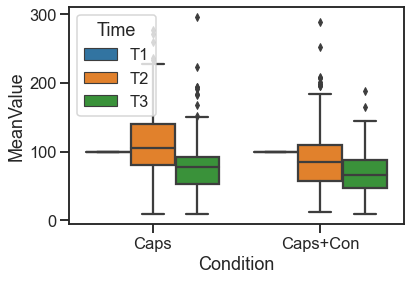

In [76]:
ax = sns.boxplot(x="Condition", y="MeanValue", hue="Time", data=Test)
#ax = sns.swarmplot(x="Mouse", y="MeanValue", data=Test, hue="Time", color=".25")
#plt.axis('off')

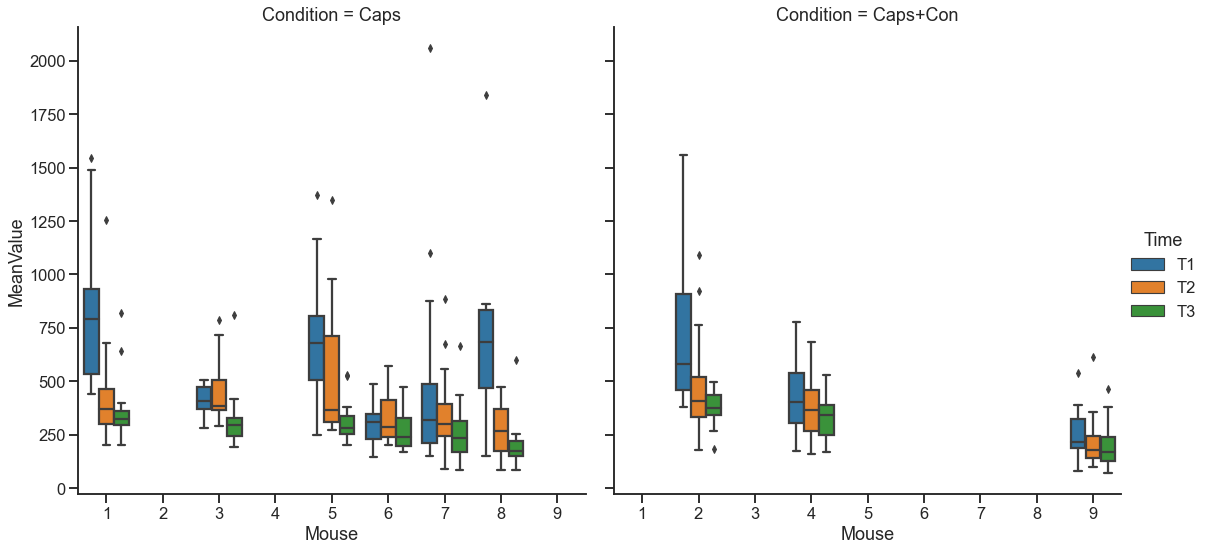

In [20]:
>>> g = sns.catplot(x="Mouse", y="MeanValue",
...                 hue="Time", col="Condition",
...                 data=Test, kind="box",
...                 height=8, aspect=1);

In [ ]:
# Mouse1_0629 = Capsaicine
# Mouse3_0629 = Capsaicine + Conotoxin
# Mouse1_0625 = Capsaicine
# Mouse2_0625 = Capsaicine + Conotoxin
# Mouse3_0625 = Capsaicine + Conotoxin ??
# Mouse3_0618 = Capsaicine
# Mouse4_0629 = Capsaicine
# Mouse4_0625 = Capsaicine
# Mouse4_0618 = Capsaicine + Conotoxin

In [14]:
TestTestTest = pd.read_excel('/Users/sdaste/Desktop/Javier/Analysis/Test_Test_Test_Excel.xlsx')

In [15]:
flights = TestTestTest.pivot("Mouse", "Time", "MeanValue")

In [17]:
flights 

Time           T1          T2          T3
Mouse                                    
1      836.040333  451.330083  372.490333
2      710.665526  477.776737  376.159789
3      408.349286  450.623357  323.488929
4      427.576429  369.667071  329.219929
5      680.230150  525.911450  305.915350
6      308.195882  317.319176  265.282412

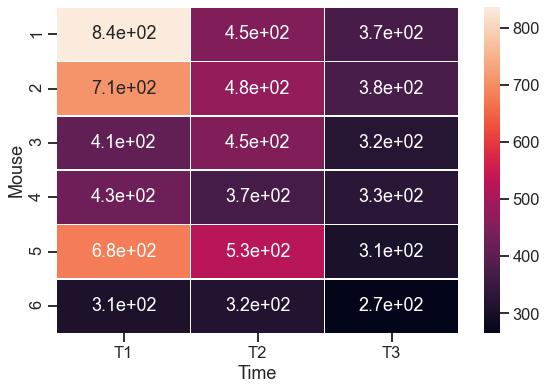

In [19]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True,linewidths=.5, ax=ax)

In [20]:
DFsorted = Test.sort_values(['Mouse', 'Time'])

In [ ]:
numCells = DF["cellID"].iloc[-1]+1

DataArray_Fadj = []
DataArray_Fadj_Fluo = []
for cell in range(numCells):
    Fadj_trace = DFsorted.loc[DFsorted.cellID==cell,'Fadj'].values
    
    
    # scale each cell's signal in its entirety
    Fadj_trace_scale=scale(Fadj_trace)

    DataArray_Fadj.append(Fadj_trace_scale.reshape(numTrials,numOdors,numFramesOdorTrial)[None])
    DataArray_Fadj_Fluo.append(Fadj_trace.reshape(numTrials,numOdors,numFramesOdorTrial)[None])
DataArray_Fadj = np.concatenate(DataArray_Fadj,0)
DataArray_Fadj_Fluo = np.concatenate(DataArray_Fadj_Fluo,0)

print (DataArray_Fadj.shape)

Text(3.8, 4.5, 'setosa')

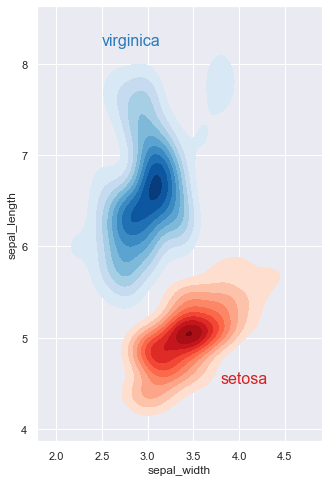

In [41]:
sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the iris dataset by species
Caps = Test.query("Condition == 'Caps'")
Caps_Con = Test.query("Condition == 'Caps+Con'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(Caps.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)

In [21]:
dataframeNew = pd.read_excel('/Users/sdaste/Desktop/Javier/Analysis/Percentage.xlsx')

In [22]:
T1_Mean_Cap = dataframeNew['T1_Mean_Cap'].tolist()
T2_Mean_Cap = dataframeNew['T2_Mean_Cap'].tolist()
T3_Mean_Cap = dataframeNew['T3_Mean_Cap'].tolist()

T1_Mean_Cap_Con = dataframeNew['T1_Mean_Cap_Con'].tolist()
T2_Mean_Cap_Con = dataframeNew['T2_Mean_Cap_Con'].tolist()
T3_Mean_Cap_Con = dataframeNew['T3_Mean_Cap_Con'].tolist()

In [23]:
AllMiceCap = T1_Mean_Cap,T2_Mean_Cap,T3_Mean_Cap
AllMiceCapCon=T1_Mean_Cap_Con,T2_Mean_Cap_Con,T3_Mean_Cap_Con

In [24]:
AllMiceCap=np.array(AllMiceCap)
AllMiceCapCon=np.array(AllMiceCapCon)

In [25]:
AllMiceCap=AllMiceCap[:, ~np.isnan(AllMiceCap).any(axis=0)]
AllMiceCapCon=AllMiceCapCon[:, ~np.isnan(AllMiceCapCon).any(axis=0)]

In [26]:
AllMiceCap = AllMiceCap.transpose(1,0)
AllMiceCapCon = AllMiceCapCon.transpose(1,0)

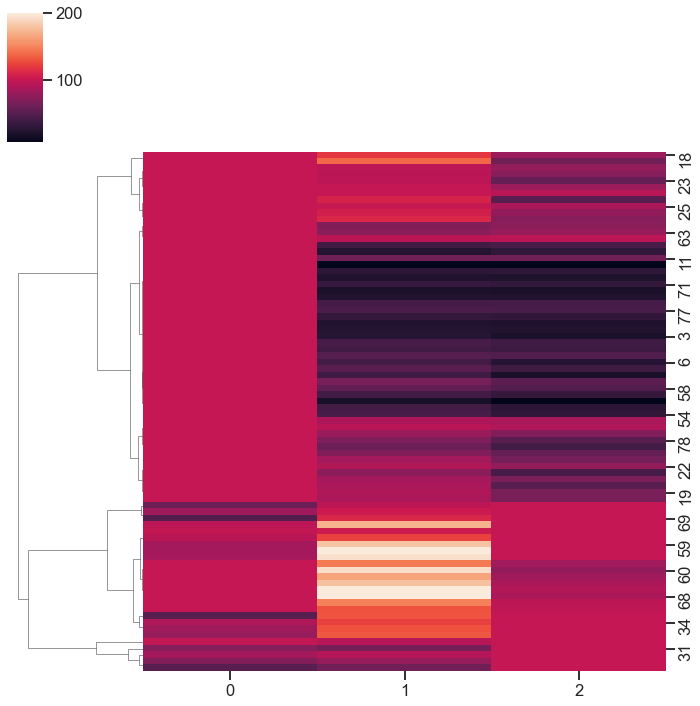

In [44]:
sns.clustermap(data=AllMiceCap,col_cluster=False, row_cluster=True, metric="correlation", vmax=200)
#Path50 = os.path.join(FOLDER_PATH, "Cluster_Map_AllMice_CAp_percentage.pdf")
#plt.savefig(path50, transparent = True, dpi = 600, bbox_inches='tight')

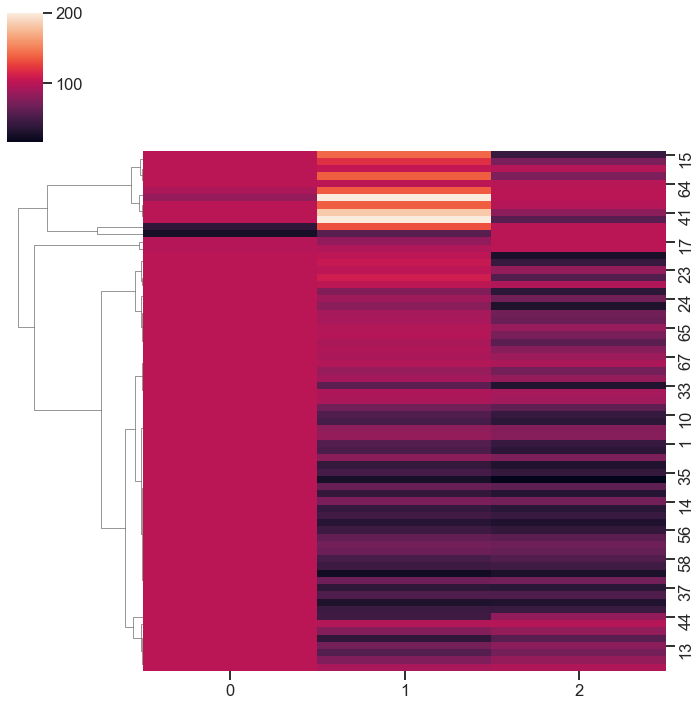

In [45]:
sns.clustermap(data=AllMiceCapCon,col_cluster=False, row_cluster=True, metric="correlation",vmax = 200)
path50 = os.path.join(FOLDER_PATH, "Cluster_Map_AllMice_CAp_Con_percentage.pdf")
plt.savefig(path50, transparent = True, dpi = 600, bbox_inches='tight')